# Procesamiento Digital de Señales con el Dataset Iris

Este notebook utiliza el dataset Iris para ilustrar conceptos fundamentales del Procesamiento Digital de Señales (DSP) desde una perspectiva didáctica. Aunque el dataset Iris no es una señal temporal, nos permite demostrar técnicas análogas a las utilizadas en DSP como:

- Transformación de datos
- Reducción de dimensionalidad
- Visualización en dominios transformados

A través de este ejercicio, aprenderemos cómo los conceptos de DSP pueden aplicarse a datos estructurados.


## 1. Carga y Exploración del Dataset

Primero, importamos las bibliotecas necesarias y cargamos el dataset Iris.


In [2]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Cargamos el dataset Iris
iris_df = pd.read_csv('Iris.csv')

# Mostramos las primeras filas del dataset
print("Primeras filas del dataset Iris:")
iris_df.head()


Primeras filas del dataset Iris:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Descripción de las Variables

El dataset Iris contiene mediciones de 3 especies diferentes de flores iris. Las variables son:

- **Id**: Identificador único para cada muestra
- **SepalLengthCm**: Longitud del sépalo en centímetros
- **SepalWidthCm**: Ancho del sépalo en centímetros
- **PetalLengthCm**: Longitud del pétalo en centímetros
- **PetalWidthCm**: Ancho del pétalo en centímetros
- **Species**: Especie de la flor iris (setosa, versicolor o virginica)

En el contexto de DSP, podemos considerar estas mediciones como "canales" de una señal multidimensional, similar a cómo procesaríamos señales de múltiples sensores.


In [3]:
# Información básica del dataset
print("\nInformación del dataset:")
iris_df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
iris_df.describe()



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Estadísticas descriptivas:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Distribución de especies:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


/var/folders/w7/r5641d8n7kz9cv7lxz57cnn00000gn/T/ipykernel_43988/1143793422.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Species', data=iris_df, palette='viridis')


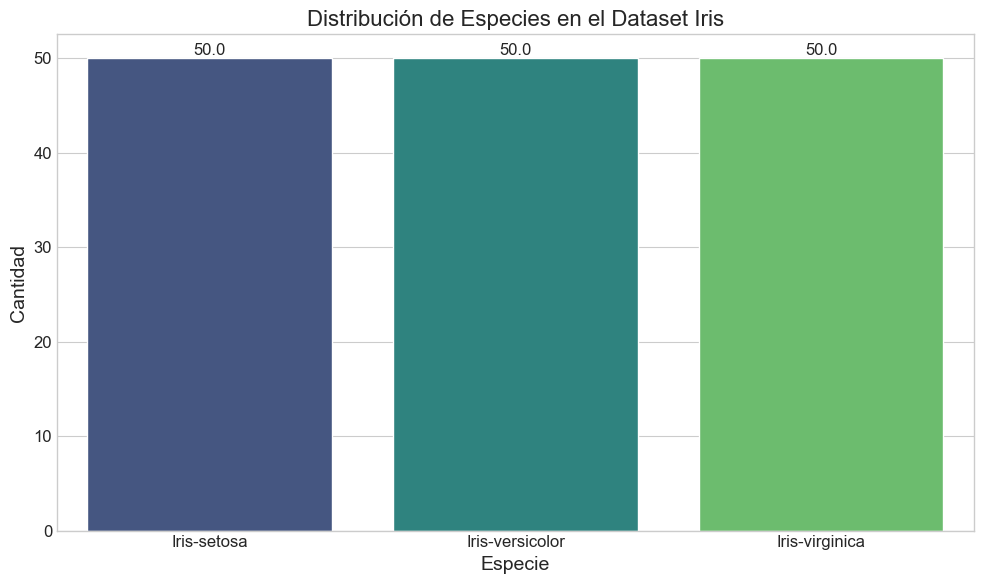

In [4]:
# Verificamos la distribución de especies
print("\nDistribución de especies:")
species_count = iris_df['Species'].value_counts()
print(species_count)

# Visualizamos la distribución de especies
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Species', data=iris_df, palette='viridis')
plt.title('Distribución de Especies en el Dataset Iris', fontsize=16)
plt.xlabel('Especie', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Añadimos etiquetas con los valores
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Visualización de los Datos

Vamos a visualizar las relaciones entre las diferentes características mediante gráficos de dispersión. Esto es análogo a visualizar diferentes componentes de una señal para entender sus relaciones.


<Figure size 1500x1000 with 0 Axes>

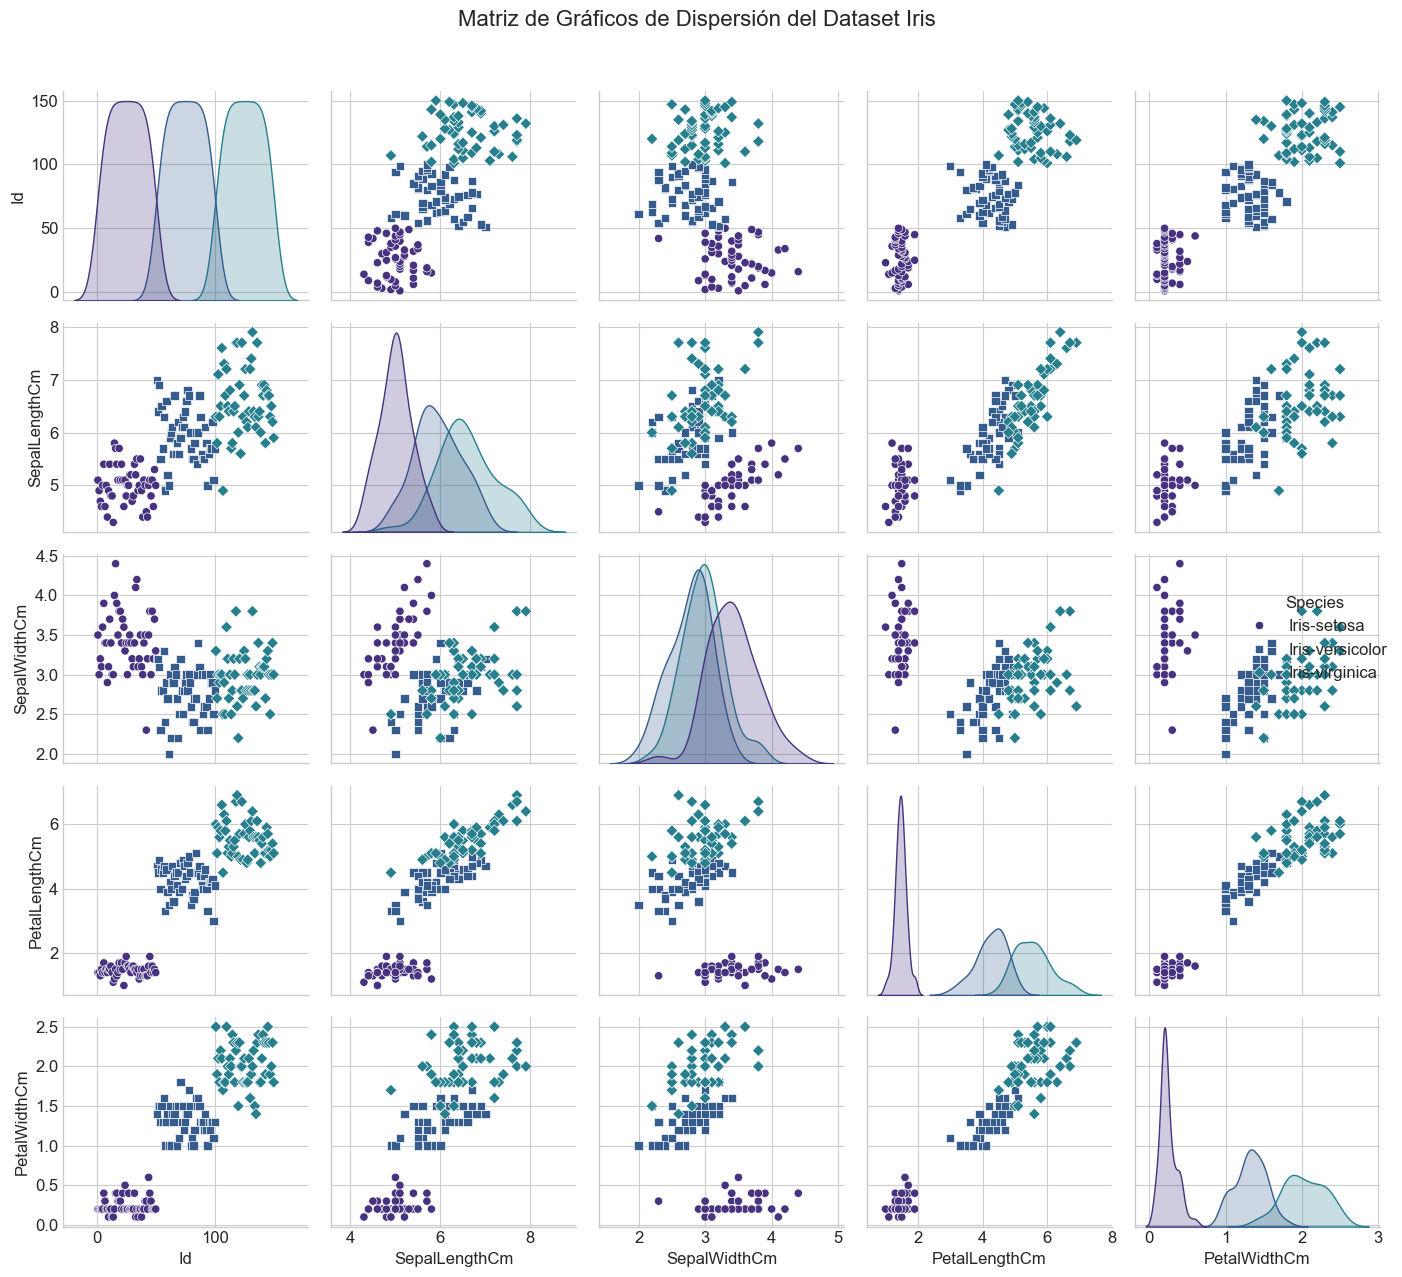

In [5]:
# Matriz de gráficos de dispersión para visualizar relaciones entre variables
plt.figure(figsize=(15, 10))
sns.pairplot(iris_df, hue='Species', height=2.5, markers=['o', 's', 'D'])
plt.suptitle('Matriz de Gráficos de Dispersión del Dataset Iris', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


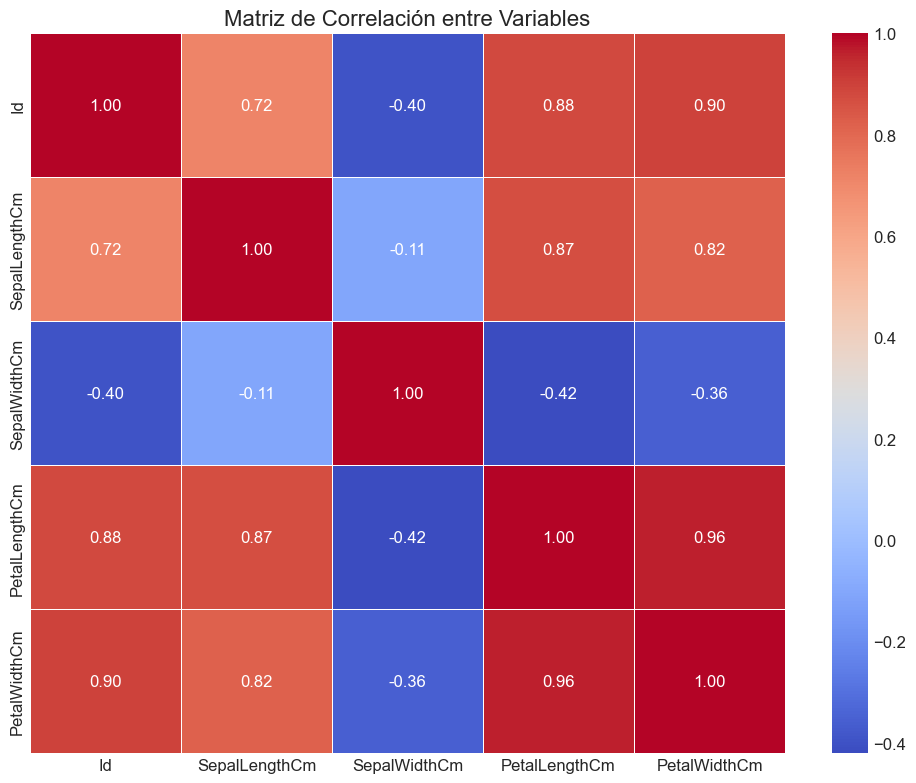

In [6]:
# Visualizamos la correlación entre variables
# Seleccionamos solo las columnas numéricas para la matriz de correlación
numeric_columns = iris_df.select_dtypes(include=[np.number]).columns
correlation_matrix = iris_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación entre Variables', fontsize=16)
plt.tight_layout()
plt.show()


## 2. Preprocesamiento de Datos

En DSP, a menudo necesitamos normalizar o filtrar señales antes de aplicar transformaciones. De manera similar, estandarizaremos nuestras variables para que tengan media 0 y desviación estándar 1.


In [7]:
# Preparamos los datos para el análisis
# Eliminamos la columna Id y separamos las características de las etiquetas
X = iris_df.drop(['Id', 'Species'], axis=1)
y = iris_df['Species']

# Mostramos las primeras filas de nuestros datos de características
print("Datos de características antes de la estandarización:")
X.head()


Datos de características antes de la estandarización:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Estandarizamos las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos el array escalado de nuevo a DataFrame para mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Datos de características después de la estandarización:")
X_scaled_df.head()

Datos de características después de la estandarización:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Justificación de la Estandarización

La estandarización es crucial antes de aplicar transformaciones como PCA por varias razones:

1. **Igualdad de escala**: Las variables con mayor varianza dominarían el análisis si no se estandarizan. En DSP, esto es análogo a asegurar que señales de diferentes amplitudes reciban igual consideración.

2. **Mejora de convergencia**: Muchos algoritmos convergen más rápido con datos estandarizados. En DSP, esto es similar a aplicar filtros de pre-énfasis antes del procesamiento principal.

3. **Interpretabilidad**: La estandarización facilita la comparación entre variables. En DSP, esto es como normalizar señales para poder compararlas en la misma escala.

Veamos cómo ha cambiado la distribución de nuestros datos después de la estandarización:


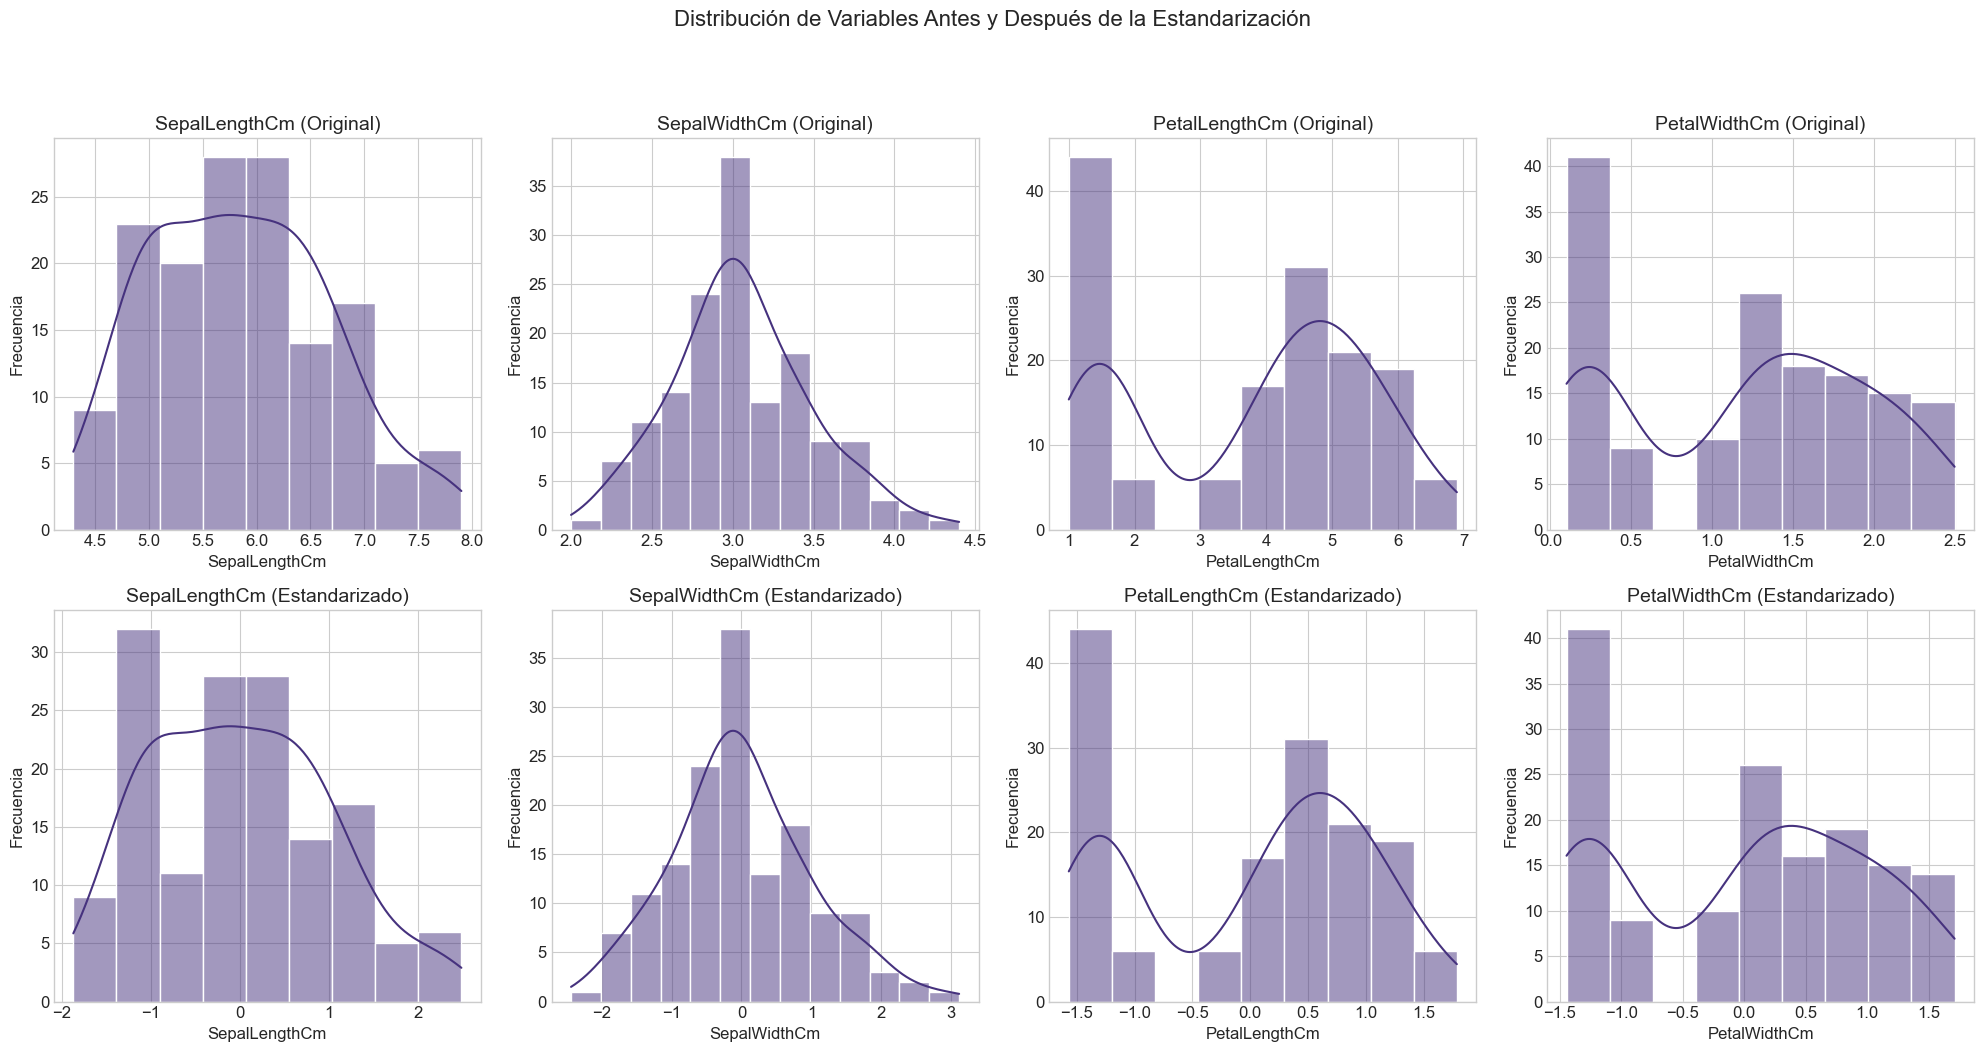

In [9]:
# Visualizamos la distribución de los datos antes y después de la estandarización
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribución de Variables Antes y Después de la Estandarización', fontsize=16, y=1.05)

# Antes de la estandarización
for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{column} (Original)', fontsize=14)
    axes[0, i].set_xlabel(column, fontsize=12)
    axes[0, i].set_ylabel('Frecuencia', fontsize=12)

# Después de la estandarización
for i, column in enumerate(X_scaled_df.columns):
    sns.histplot(X_scaled_df[column], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'{column} (Estandarizado)', fontsize=14)
    axes[1, i].set_xlabel(column, fontsize=12)
    axes[1, i].set_ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()


## 3. Transformación con PCA

### ¿Qué es PCA?

El Análisis de Componentes Principales (PCA) es una técnica de transformación que puede entenderse como un cambio de base o dominio, similar a la Transformada de Fourier en DSP.

- **En DSP**: La Transformada de Fourier convierte una señal del dominio del tiempo al dominio de la frecuencia, revelando componentes frecuenciales ocultos.
  
- **En PCA**: Transformamos los datos de su espacio original a un nuevo espacio de componentes principales, revelando la estructura subyacente de los datos.

PCA encuentra direcciones (componentes principales) en el espacio de características que maximizan la varianza de los datos proyectados. Estas direcciones son ortogonales entre sí, formando una nueva base para representar los datos.

Esto es análogo a cómo la Transformada de Fourier descompone una señal en componentes sinusoidales ortogonales (senos y cosenos de diferentes frecuencias).


In [11]:
# Aplicamos PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Creamos un DataFrame con los componentes principales
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

# Añadimos la columna de especies para la visualización
pca_df['Species'] = y.values

# Mostramos los primeros registros transformados
print("Datos transformados con PCA:")
pca_df.head()


Datos transformados con PCA:


,PC1,PC2,PC3,PC4,Species
0,-2.264542,0.505704,0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,-0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,-0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,-0.021428,0.037397,Iris-setosa


### Varianza Explicada por cada Componente

En DSP, cuando descomponemos una señal en sus componentes frecuenciales, algunas frecuencias contienen más energía (información) que otras. De manera similar, en PCA, algunos componentes principales capturan más varianza (información) que otros.


In [13]:
# Calculamos la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Creamos un DataFrame para mostrar la varianza explicada
variance_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Varianza Explicada (%)': explained_variance * 100,
    'Varianza Acumulada (%)': cumulative_variance * 100
})

print("Varianza explicada por cada componente principal:")
variance_df


Varianza explicada por cada componente principal:


,Componente,Varianza Explicada (%),Varianza Acumulada (%)
0,PC1,72.770452,72.770452
1,PC2,23.030523,95.800975
2,PC3,3.683832,99.484807
3,PC4,0.515193,100.000000


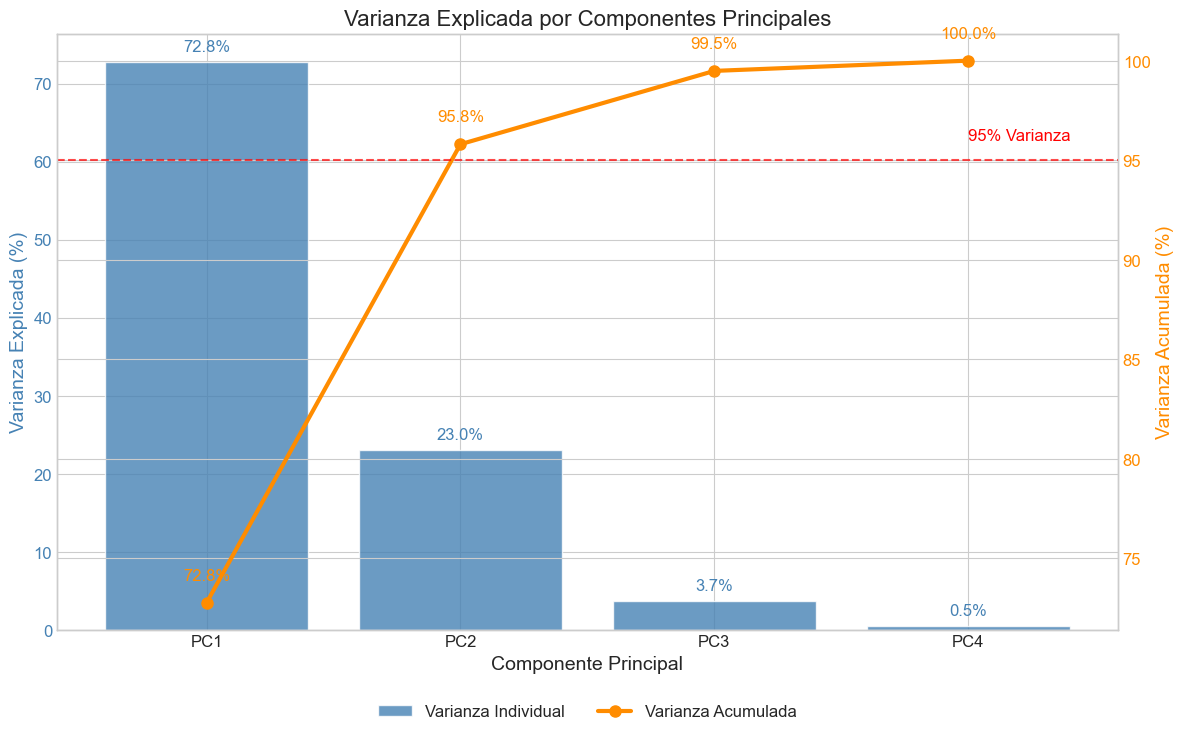

In [14]:
# Visualizamos la varianza explicada
fig, ax1 = plt.subplots(figsize=(12, 7))

# Gráfico de barras para la varianza individual
ax1.bar(variance_df['Componente'], variance_df['Varianza Explicada (%)'], 
        color='steelblue', alpha=0.8, label='Varianza Individual')
ax1.set_xlabel('Componente Principal', fontsize=14)
ax1.set_ylabel('Varianza Explicada (%)', fontsize=14, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Añadimos etiquetas con los valores de varianza
for i, v in enumerate(variance_df['Varianza Explicada (%)']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, color='steelblue')

# Creamos un segundo eje Y para la varianza acumulada
ax2 = ax1.twinx()
ax2.plot(variance_df['Componente'], variance_df['Varianza Acumulada (%)'], 
         'o-', color='darkorange', linewidth=3, markersize=8, label='Varianza Acumulada')
ax2.set_ylabel('Varianza Acumulada (%)', fontsize=14, color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Añadimos etiquetas con los valores de varianza acumulada
for i, v in enumerate(variance_df['Varianza Acumulada (%)']):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, color='darkorange')

# Añadimos una línea horizontal en el 95% de varianza acumulada
ax2.axhline(y=95, color='red', linestyle='--', alpha=0.7)
ax2.text(len(explained_variance)-1, 96, '95% Varianza', color='red', fontsize=12)

# Añadimos título y leyenda
plt.title('Varianza Explicada por Componentes Principales', fontsize=16)
fig.tight_layout()

# Combinamos las leyendas de ambos ejes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fontsize=12)

plt.show()


### Visualización en el Espacio Reducido

Ahora visualizaremos los datos en el espacio de los dos primeros componentes principales. Esto es análogo a visualizar una señal en el dominio transformado (como el espectrograma en DSP).


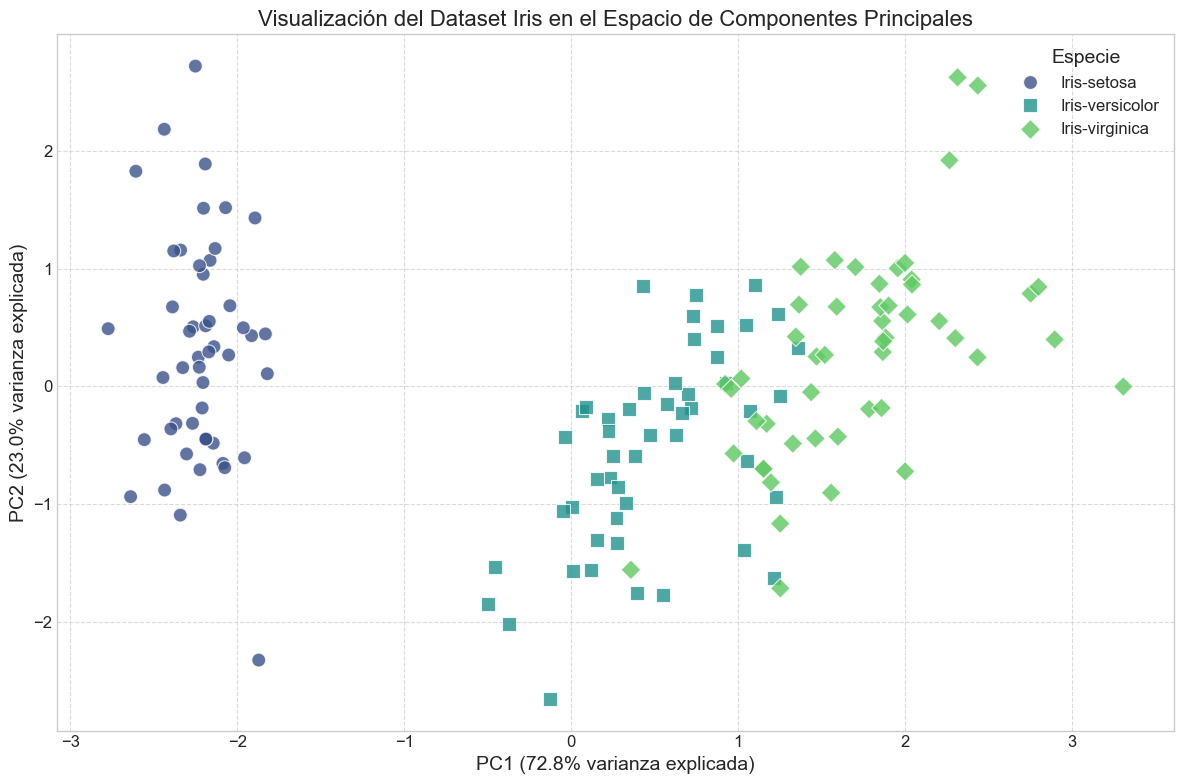

In [27]:
# Visualizamos los datos en el espacio de los dos primeros componentes principales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, s=100, alpha=0.8,
                palette='viridis', style='Species', markers=['o', 's', 'D'])

# Añadimos título y etiquetas
plt.title('Visualización del Dataset Iris en el Espacio de Componentes Principales', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% varianza explicada)', fontsize=14)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% varianza explicada)', fontsize=14)

# Añadimos una cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Añadimos una leyenda
plt.legend(title='Especie', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


### Interpretación de los Componentes Principales

Podemos interpretar los componentes principales examinando cómo se relacionan con las variables originales. Esto es similar a analizar qué frecuencias contribuyen más a una señal en DSP.


In [28]:
# Examinamos los loadings (coeficientes) de cada componente principal
loadings = pca.components_
loadings_df = pd.DataFrame(
    data=loadings.T,
    columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
    index=X.columns
)

print("Loadings (coeficientes) de cada componente principal:")
loadings_df


Loadings (coeficientes) de cada componente principal:


,PC1,PC2,PC3,PC4
SepalLengthCm,0.522372,0.372318,0.721017,-0.261996
SepalWidthCm,-0.263355,0.925556,-0.242033,0.124135
PetalLengthCm,0.581254,0.021095,-0.140892,0.801154
PetalWidthCm,0.565611,0.065416,-0.633801,-0.523546


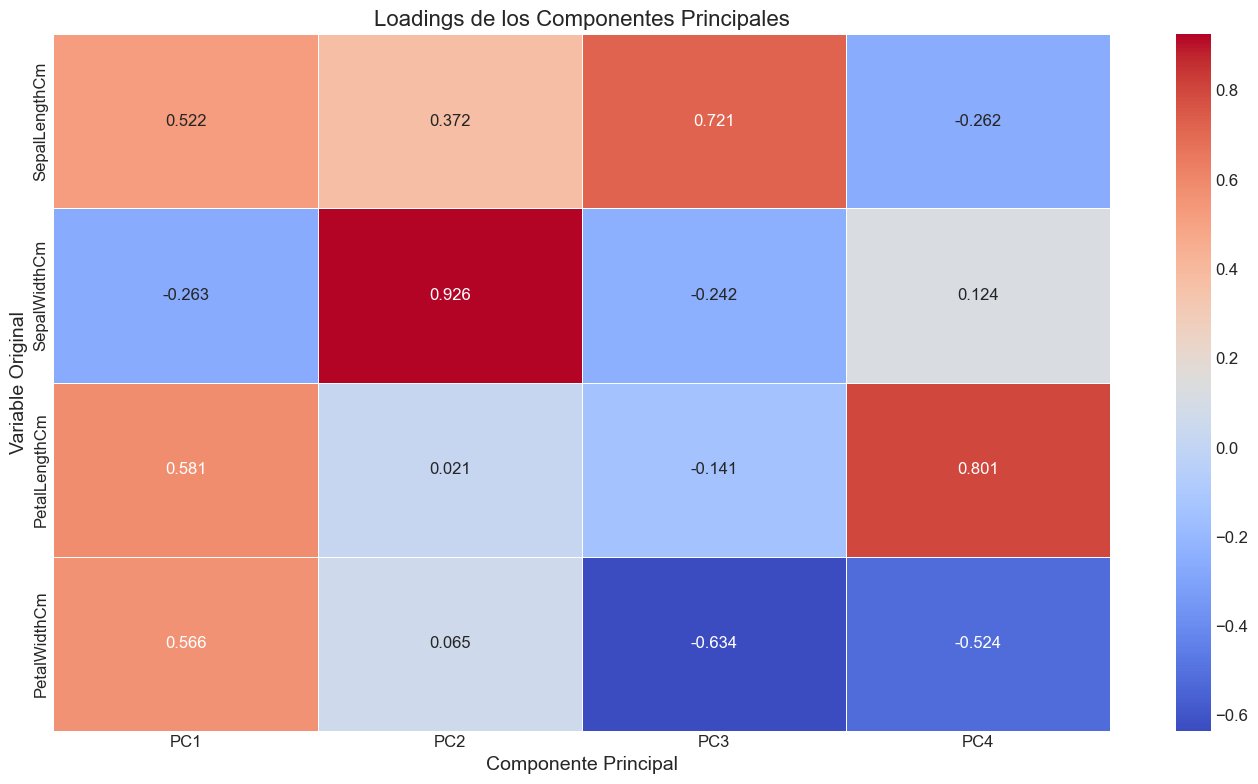

In [17]:
# Visualizamos los loadings
plt.figure(figsize=(14, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f')
plt.title('Loadings de los Componentes Principales', fontsize=16)
plt.xlabel('Componente Principal', fontsize=14)
plt.ylabel('Variable Original', fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/w7/r5641d8n7kz9cv7lxz57cnn00000gn/T/ipykernel_43988/511637297.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.index, y=loadings_df[pc], palette='viridis')
/var/folders/w7/r5641d8n7kz9cv7lxz57cnn00000gn/T/ipykernel_43988/511637297.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.index, y=loadings_df[pc], palette='viridis')


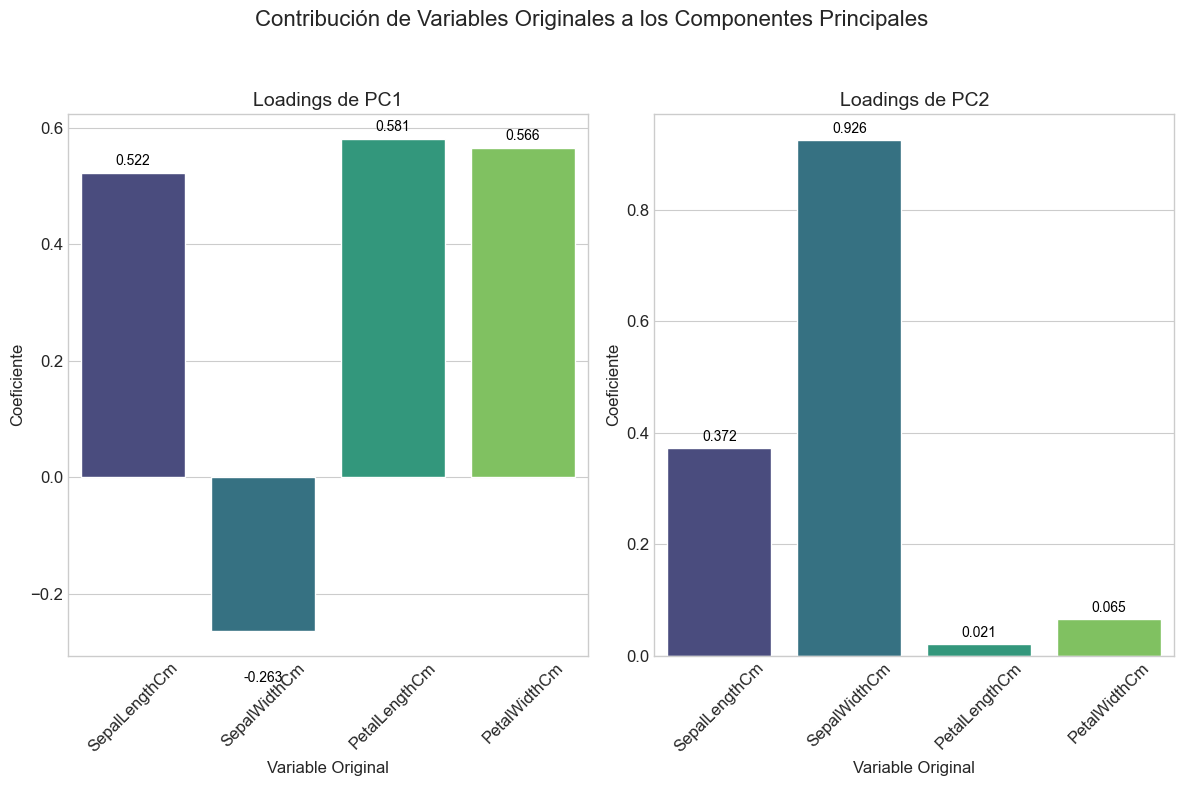

In [29]:
# Visualizamos los loadings de los dos primeros componentes principales
plt.figure(figsize=(12, 8))

# Creamos un gráfico de barras para los loadings
for i, pc in enumerate(['PC1', 'PC2']):
    plt.subplot(1, 2, i+1)
    sns.barplot(x=loadings_df.index, y=loadings_df[pc], palette='viridis')
    plt.title(f'Loadings de {pc}', fontsize=14)
    plt.xlabel('Variable Original', fontsize=12)
    plt.ylabel('Coeficiente', fontsize=12)
    plt.xticks(rotation=45)
    
    # Añadimos etiquetas con los valores
    for j, v in enumerate(loadings_df[pc]):
        plt.text(j, v + 0.02 if v >= 0 else v - 0.08, f'{v:.3f}', 
                 ha='center', va='center', fontsize=10, color='black')

plt.suptitle('Contribución de Variables Originales a los Componentes Principales', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## 4. Interpretación y Uso Educativo en DSP

### Analogía con la Compresión de Señales

En DSP, a menudo comprimimos señales eliminando componentes de baja energía. De manera similar, PCA nos permite reducir la dimensionalidad de nuestros datos conservando la mayor cantidad de información posible.


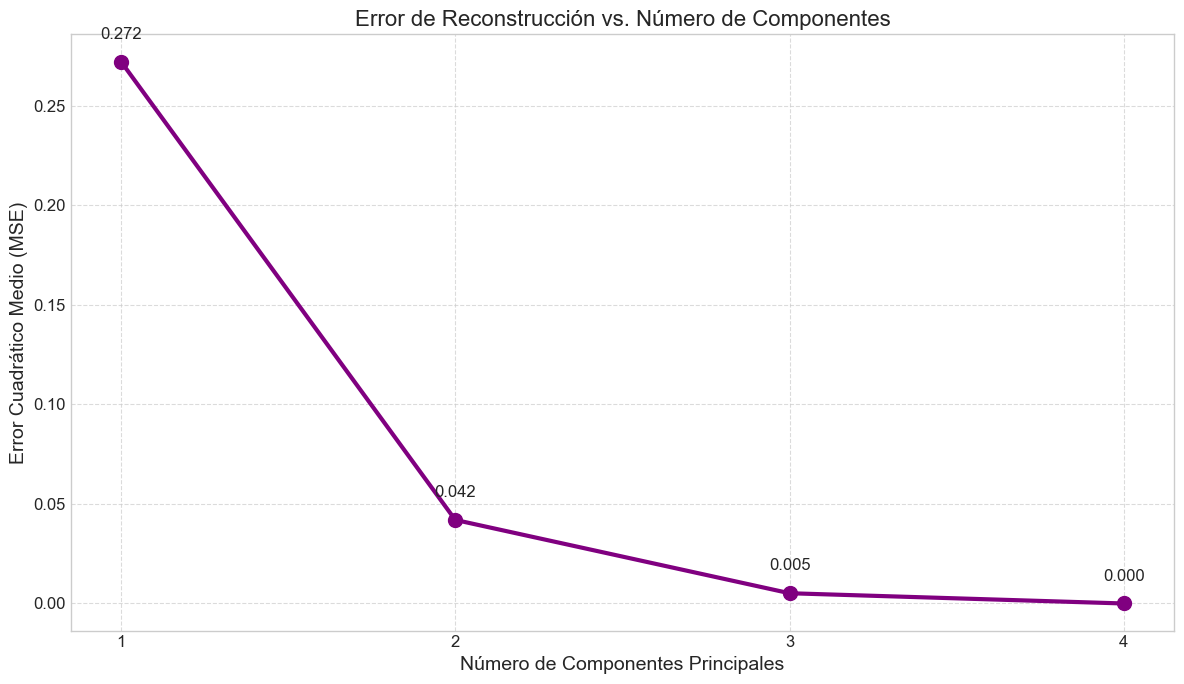

In [30]:
# Demostramos la reconstrucción de datos con diferentes números de componentes
# Esto es análogo a la compresión de señales con diferentes tasas de compresión

# Función para reconstruir datos usando un número específico de componentes
def reconstruct_data(pca, X_scaled, n_components):
    # Proyectamos los datos al espacio reducido
    X_reduced = pca.transform(X_scaled)[:, :n_components]
    
    # Reconstruimos los datos
    X_reconstructed = np.dot(X_reduced, pca.components_[:n_components, :]) + pca.mean_
    
    return X_reconstructed

# Reconstruimos los datos con diferentes números de componentes
reconstructions = []
for n_comp in range(1, X.shape[1] + 1):
    X_reconstructed = reconstruct_data(pca, X_scaled, n_comp)
    reconstructions.append(X_reconstructed)

# Calculamos el error de reconstrucción (MSE) para cada número de componentes
mse = [np.mean((X_scaled - rec) ** 2) for rec in reconstructions]

# Visualizamos el error de reconstrucción
plt.figure(figsize=(12, 7))
plt.plot(range(1, X.shape[1] + 1), mse, 'o-', linewidth=3, markersize=10, color='purple')
plt.title('Error de Reconstrucción vs. Número de Componentes', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=14)
plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=14)
plt.xticks(range(1, X.shape[1] + 1))
plt.grid(True, linestyle='--', alpha=0.7)

# Añadimos etiquetas con los valores de MSE
for i, v in enumerate(mse):
    plt.text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Analogía con la Separación de Fuentes

En DSP, técnicas como el Análisis de Componentes Independientes (ICA) se utilizan para separar señales mezcladas. PCA puede verse como un primer paso en este proceso, identificando direcciones ortogonales de máxima varianza.


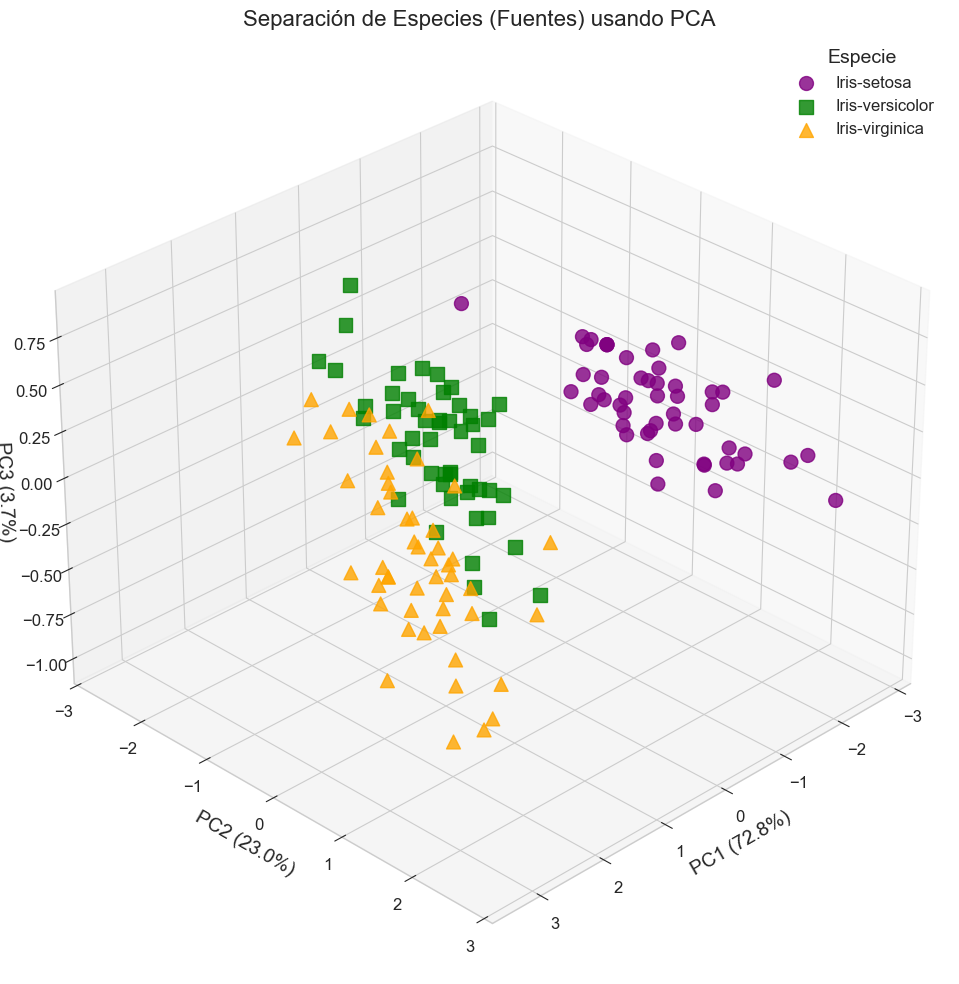

In [31]:
# Visualizamos cómo PCA separa las diferentes especies (fuentes)
# Creamos un gráfico 3D para visualizar los primeros 3 componentes principales
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Creamos un diccionario para mapear especies a colores y marcadores
species_unique = pca_df['Species'].unique()
colors = ['purple', 'green', 'orange']
markers = ['o', 's', '^']

# Graficamos cada especie con un color y marcador diferente
for i, species in enumerate(species_unique):
    indices = pca_df['Species'] == species
    ax.scatter(pca_df.loc[indices, 'PC1'], 
               pca_df.loc[indices, 'PC2'], 
               pca_df.loc[indices, 'PC3'],
               c=colors[i], marker=markers[i], s=100, alpha=0.8, label=species)

# Añadimos etiquetas y título
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=14)
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=14)
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}%)', fontsize=14)
ax.set_title('Separación de Especies (Fuentes) usando PCA', fontsize=16)

# Añadimos una leyenda
ax.legend(title='Especie', fontsize=12, title_fontsize=14)

# Ajustamos la vista
ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()


### Analogía con la Extracción de Características

En DSP, a menudo extraemos características relevantes de señales (como MFCC en procesamiento de voz). PCA puede verse como una forma de extraer características relevantes de datos multidimensionales.


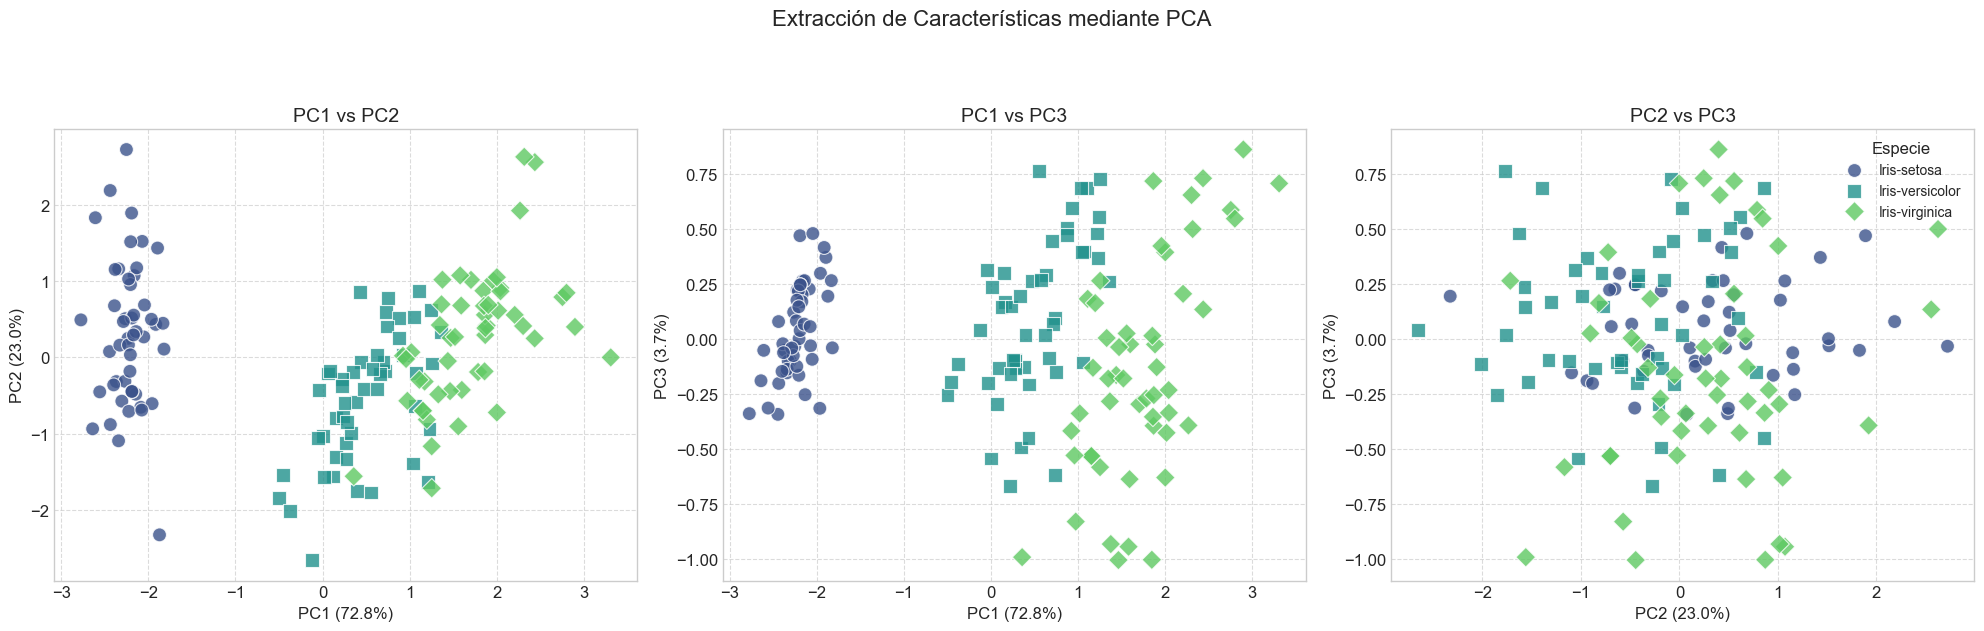

In [32]:
# Demostramos cómo PCA puede usarse para extraer características relevantes
# Visualizamos la proyección de los datos originales en los componentes principales

# Creamos un gráfico de dispersión para cada par de componentes principales
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Extracción de Características mediante PCA', fontsize=16, y=1.05)

# Pares de componentes a visualizar
pc_pairs = [(0, 1), (0, 2), (1, 2)]

for i, (pc1_idx, pc2_idx) in enumerate(pc_pairs):
    pc1 = f'PC{pc1_idx+1}'
    pc2 = f'PC{pc2_idx+1}'
    
    # Graficamos la dispersión
    sns.scatterplot(x=pc1, y=pc2, hue='Species', data=pca_df, s=100, alpha=0.8,
                    palette='viridis', style='Species', markers=['o', 's', 'D'], ax=axes[i])
    
    # Añadimos título y etiquetas
    axes[i].set_title(f'{pc1} vs {pc2}', fontsize=14)
    axes[i].set_xlabel(f'{pc1} ({explained_variance[pc1_idx]*100:.1f}%)', fontsize=12)
    axes[i].set_ylabel(f'{pc2} ({explained_variance[pc2_idx]*100:.1f}%)', fontsize=12)
    
    # Añadimos una cuadrícula
    axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Configuramos la leyenda
    if i == 2:  # Solo mostramos la leyenda en el último gráfico
        axes[i].legend(title='Especie', fontsize=10, title_fontsize=12)
    else:
        axes[i].legend().set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## 5. Visualizaciones Adicionales

### Biplot: Visualización Conjunta de Observaciones y Variables

Un biplot nos permite visualizar tanto las observaciones como las variables en el espacio de los componentes principales. Esto es análogo a un espectrograma en DSP, donde podemos ver tanto el tiempo como la frecuencia.


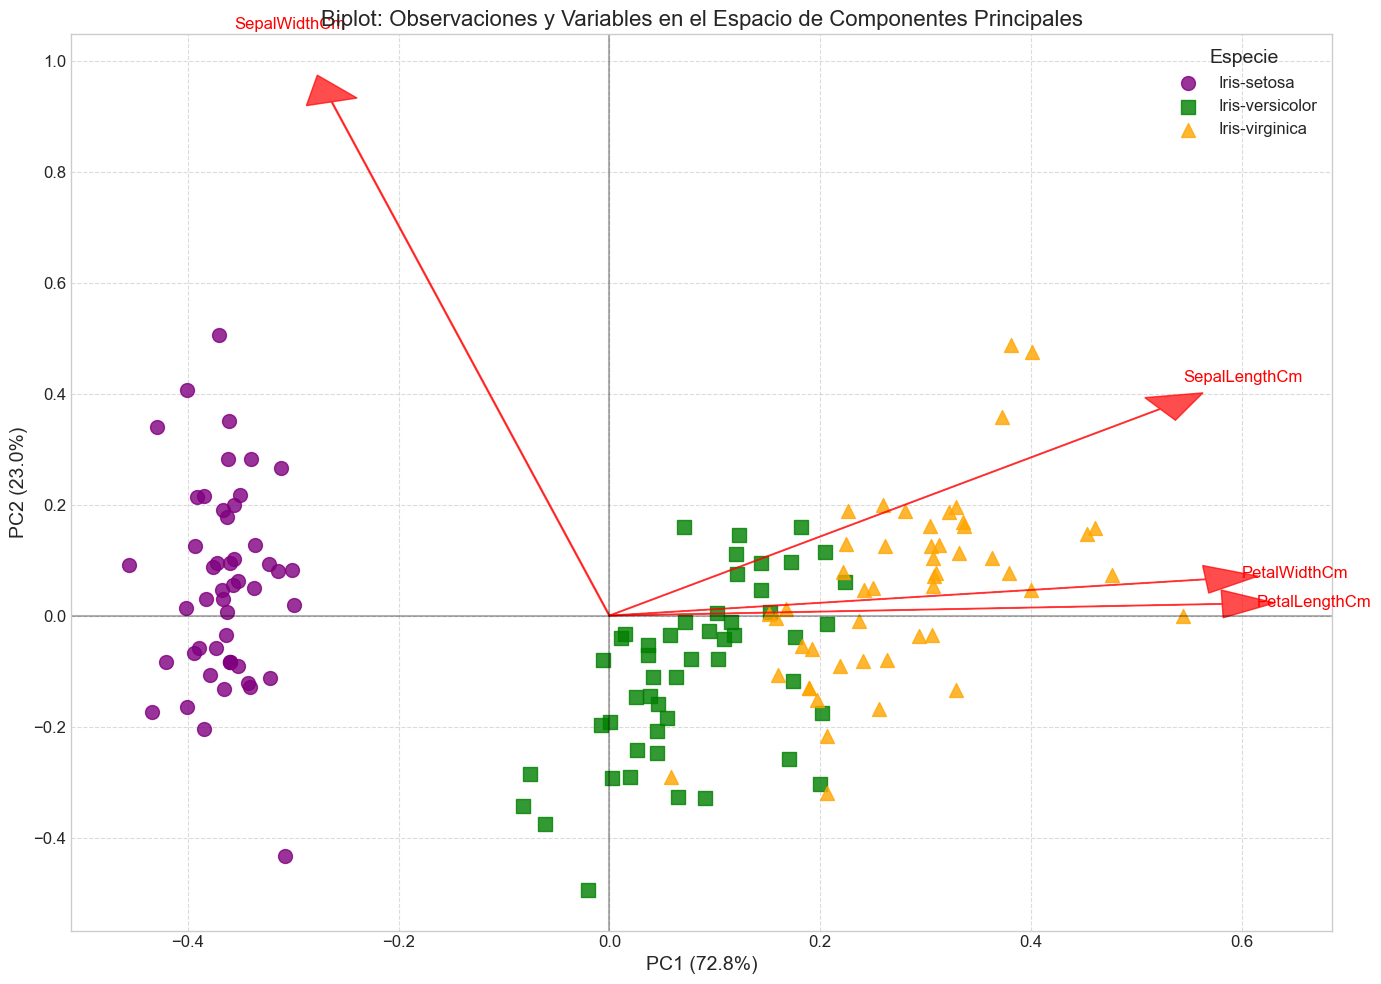

In [33]:
# Creamos un biplot para visualizar observaciones y variables
def biplot(score, coef, labels=None):
    plt.figure(figsize=(14, 10))
    
    # Escalamos los coeficientes
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Graficamos las observaciones
    for i, species in enumerate(iris_df['Species'].unique()):
        indices = iris_df['Species'] == species
        plt.scatter(xs[indices] * scalex, ys[indices] * scaley, 
                   c=['purple', 'green', 'orange'][i], marker=['o', 's', '^'][i], 
                   s=100, alpha=0.8, label=species)
    
    # Graficamos las variables
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], coef[i,1], color='r', alpha=0.7, head_width=0.05, head_length=0.05)
        if labels is not None:
            plt.text(coef[i,0] * 1.15, coef[i,1] * 1.15, labels[i], color='r', ha='center', va='center', fontsize=12)
    
    plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}%)", fontsize=14)
    plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}%)", fontsize=14)
    plt.title("Biplot: Observaciones y Variables en el Espacio de Componentes Principales", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend(title='Especie', fontsize=12, title_fontsize=14)
    plt.tight_layout()
    
# Aplicamos la función biplot
biplot(X_pca[:,:2], np.transpose(pca.components_[:2, :]), X.columns)
plt.show()


### Visualización 3D Interactiva

Podemos crear una visualización 3D interactiva para explorar mejor los datos en el espacio de los componentes principales. Esto es análogo a herramientas de visualización avanzadas en DSP.


In [34]:
# Creamos una visualización 3D interactiva
from ipywidgets import interact, widgets

def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficamos cada especie
    for i, species in enumerate(pca_df['Species'].unique()):
        indices = pca_df['Species'] == species
        ax.scatter(pca_df.loc[indices, 'PC1'], 
                   pca_df.loc[indices, 'PC2'], 
                   pca_df.loc[indices, 'PC3'],
                   c=['purple', 'green', 'orange'][i], marker=['o', 's', '^'][i], 
                   s=80, alpha=0.8, label=species)
    
    # Añadimos etiquetas y título
    ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
    ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
    ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}%)', fontsize=12)
    ax.set_title('Visualización 3D Interactiva de PCA', fontsize=14)
    
    # Configuramos la vista
    ax.view_init(elev=elev, azim=azim)
    
    # Añadimos una leyenda
    ax.legend(title='Especie', fontsize=10, title_fontsize=12)
    
    plt.tight_layout()
    return ax

# Creamos controles interactivos
interact(plot_3d, elev=widgets.IntSlider(min=0, max=90, step=5, value=30),
         azim=widgets.IntSlider(min=0, max=360, step=5, value=30))


interactive(children=(IntSlider(value=30, description='elev', max=90, step=5), IntSlider(value=30, description…

<function __main__.plot_3d(elev=30, azim=30)>

## 6. Conclusión

En este notebook, hemos utilizado el dataset Iris para ilustrar conceptos fundamentales del Procesamiento Digital de Señales (DSP) desde una perspectiva didáctica. Aunque el dataset Iris no es una señal temporal, nos ha permitido demostrar técnicas análogas a las utilizadas en DSP:

1. **Preprocesamiento de datos**: Similar a la normalización y filtrado de señales en DSP.
   
2. **Transformación con PCA**: Análoga a transformaciones como la Transformada de Fourier, que cambian la representación de los datos a un dominio diferente.
   
3. **Reducción de dimensionalidad**: Similar a la compresión de señales en DSP, donde eliminamos componentes de baja energía.
   
4. **Separación de clases**: Análoga a la separación de fuentes en DSP, como en el Análisis de Componentes Independientes (ICA).
   
5. **Extracción de características**: Similar a la extracción de características relevantes de señales, como MFCC en procesamiento de voz.

### Extensión a Señales Reales

Este enfoque didáctico puede extenderse fácilmente a señales reales como:

- **Señales de audio**: Aplicando PCA a espectrogramas para identificar componentes principales en música o voz.
  
- **Señales biomédicas**: Utilizando PCA para reducir el ruido y extraer características relevantes de señales EEG o ECG.
  
- **Imágenes**: Aplicando PCA para compresión de imágenes o reconocimiento facial.
  
- **Señales de sensores múltiples**: Utilizando PCA para fusionar información de múltiples sensores y reducir la dimensionalidad.

La ventaja de comenzar con un dataset estructurado como Iris es que proporciona una base clara y visual para entender estos conceptos antes de aplicarlos a señales más complejas.

En resumen, este notebook ha demostrado cómo los conceptos de DSP pueden aplicarse y visualizarse utilizando un dataset estructurado, proporcionando una introducción accesible a técnicas que luego pueden aplicarse a señales temporales reales.